# Code alongs - overfitting and underfitting

## Silulate data

$y = a_0 + a_1x + a_2x^2 + \epsilon$

where $\epsilon \sim \mathcal{N}(0,1)$ (the error is standard normal distributed)

In [4]:
import numpy as np
import matplotlib.pyplot as plt

samples = 100
X = np.random.uniform(-3, 3, (samples, 1))
X.shape

(100, 1)

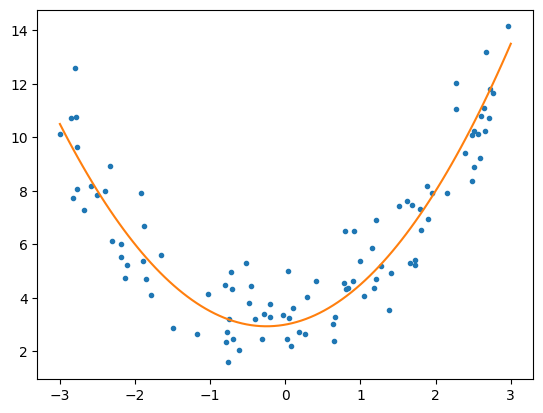

In [9]:
# a0 = 3, a1 = 0.5, a2 = 1
f = lambda x: x**2 + 0.5*x + 3
# y = a0 + a1x a2x^2 + epsilon
y = f(X) + np.random.randn(samples, 1)

# linespace gives equally spaced numbers between low and high
# between -3 and 3 we get 100 equally spaced numbers
x = np.linspace(-3, 3, samples)

plt.plot(X, y, '.')
plt.plot(x, f(x))

<Axes: title={'center': '$y = x^2+0.5x+3+\\epsilon$'}>

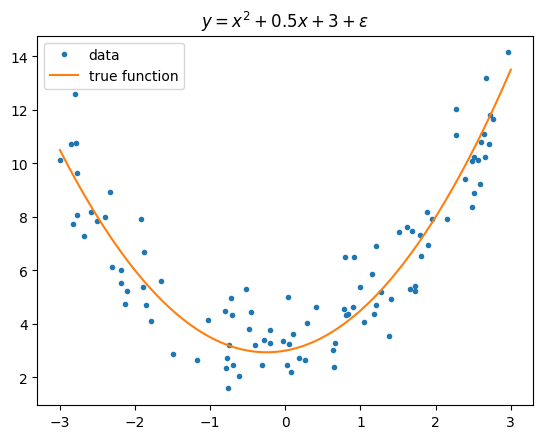

In [16]:
def draw_data():
    fig, ax = plt.subplots()
    ax.plot(X, y, '.', label="data")
    ax.plot(x, f(x), label="true function")
    ax.set(title = r"$y = x^2+0.5x+3+\epsilon$")
    ax.legend()

    return ax
draw_data()

## Polynomial regression

In [22]:
X[:5], X.shape

(array([[-2.30065071],
        [-2.10899759],
        [ 1.3823731 ],
        [-2.40185373],
        [-2.79349594]]),
 (100, 1))

### Feature engineering

- created polynomial features from the dataset

In [21]:
from sklearn.preprocessing import PolynomialFeatures

# include_bias = True -> a column of 1s are included, and if false it's excluded
# we use False as LinearRegression() handles the bias
# instantiate a PolynomialFeatures instance from the PolynomialFeatures class
poly = PolynomialFeatures(degree=2, include_bias=False)

# from X had [x1] -> now it has [x1, x1^2]
poly_features = poly.fit_transform(X)
poly_features[:5], poly_features.shape

(array([[-2.30065071,  5.2929937 ],
        [-2.10899759,  4.44787084],
        [ 1.3823731 ,  1.91095539],
        [-2.40185373,  5.76890132],
        [-2.79349594,  7.80361956]]),
 (100, 2))

### Train on transformed dataset

- use multiple linear regression on our polynomial features
- this gives us polynomial regression of second order

In [27]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(poly_features, y)

# estimated a1, a2 from data, note that true value was a1=0.5, a2=1
model.coef_

array([[0.47567382, 0.93919295]])

In [28]:
# estimated a0 from data, note that true a0 = 3
model.intercept_

array([3.21998467])

### Visualise true model and estimated model

In [33]:
# x is our linspace, it's 1 dimensional
x[:5], x.shape

(array([-3.        , -2.93939394, -2.87878788, -2.81818182, -2.75757576]),
 (100,))

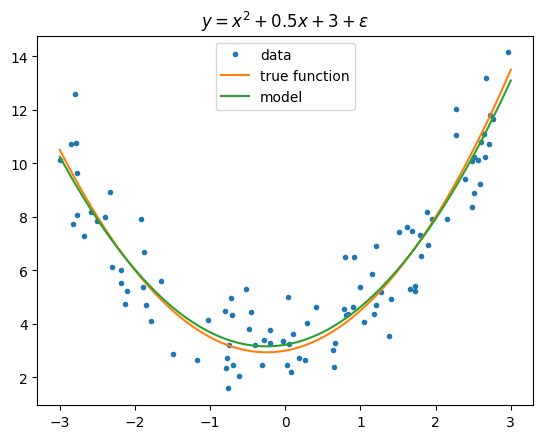

In [34]:

x_poly_features = poly.transform(x.reshape(-1,1))
y_pred = model.predict(x_poly_features)

ax = draw_data()
ax.plot(x, y_pred, label="model")
ax.legend()